In [1]:
import numpy as np
import pickle
import glob
from sklearn.mixture import  GaussianMixture
from sklearn import mixture,metrics
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [29]:
pklPath  = '/content/drive/MyDrive/Research Project/random-word-vectors-main/words_pkl_750/'

In [30]:
files = glob.glob(pklPath+"*.pkl")
#files[1].split('/')[-1]

In [31]:
len(files)
sts = {}
for f in files:
  sts[f.split('/')[-1].split('.')[0]]=0

In [32]:
objects = []
words = []
with open (pklPath+'MOG_Clusters_256.txt','w')as txtfile:
  for ifile in files:
    #print(ifile)
    index = 0
    words.append(ifile.split('/')[-1].split('.')[0])
    if words[-1] !='xxx':
      with (open(pklPath+words[-1]+'.pkl', "rb")) as openfile:
          while True:
              try:
                word_vectors = pickle.load(openfile)
                #print(word_vectors)
                vec = list(word_vectors.keys())[2:]
                for ivec in vec:
                  #print(index,ivec)
                  if index==0:
                    arr = word_vectors[ivec].reshape(1,1024)
                    index+=1
                  else:
                    arr = np.row_stack((arr,word_vectors[ivec].reshape(1,1024)))
                    index+=1
              except EOFError:
                break
      #with (open(pklPath+'word_stats/'+words[-1]+"_4.pkl", "rb")) as openfile:
        #while True:
          #try:
              #objects.append(pickle.load(openfile))
          #except EOFError:
              #break
      k_Components = word_vectors[list(word_vectors.keys())[1]]
      print(words[-1],":",k_Components)
      sts[words[-1]]+=k_Components
      if k_Components<0:
      #if words[-1] == 'chemical':
        #print(k_Components)
        #print(arr.shape)
        #print(words[-1],":",k_Components)
        k = min(16,k_Components)
        K = range(1,k)
        mogs = [GaussianMixture(n_components=k,max_iter=500).fit(arr) for k in K]
        bics = [mog.bic(arr) for mog in mogs]
        aics = [mog.aic(arr) for mog in mogs]
        llks = [mog.score(arr) for mog in mogs]
        ss = []
        for mog in mogs:
          y = mog.predict(arr)
          try:
            ss.append(round(metrics.silhouette_score(arr,y),4))
          except:
            #print(mog.n_components)
            pass
        print(words[-1],":",k_Components," :",np.argmax(ss)+2," :",ss[np.argmax(ss)],':', ss)
        result = '{} , {}, {}, {}, {}\n'.format(words[-1],k_Components,np.argmax(ss)+2,ss[np.argmax(ss)],ss)
        for mog in mogs:
          print (mog.weights_)
        #txtfile.write(result)
        #plt.plot(range(2,k),ss)
        #plt.xlabel('Mean silhouette Score')
        #plt.ylabel('Number Of Clusters')
        #plt.title('Mean Silhouette score vs Number of Clusters')
        #plt.show()

nonmetallic : 3
newborn : 3
fried : 3
runaway : 3
overcast : 6
manned : 3
bacterial : 12
deceased : 3
crimson : 3
scrambled : 3
blonde : 3
interstate : 3
soaked : 3
elastic : 3
glittering : 3
taut : 3
skeletal : 12
civilian : 9
bombproof : 3
muddy : 6
nasal : 3
septic : 3
diagonal : 3
erect : 6
steaming : 3
damp : 3
bathing : 3
dusty : 6
bronchial : 27
capillary : 6
anterior : 3
flowering : 3
taller : 3
icy : 3
giant : 9
haired : 6
opaque : 3
lunar : 6
mountainous : 3
naval : 15
sheltered : 3
wavy : 3
purple : 6
bald : 3
comic : 6
criminal : 9
cylindrical : 3
porous : 9
sunny : 3
velvety : 3
blooming : 9
oily : 3
solar : 15
wounded : 9
greasy : 6
jerky : 3
asleep : 12
barefoot : 3
cool : 24
waxed : 3
breathless : 3
sole : 9
pelvic : 3
blackened : 3
swelling : 3
adjacent : 6
oval : 3
gymnastic : 3
abdominal : 3
pregnant : 3
barbed : 3
upward : 6
jagged : 3
sweaty : 3
sticky : 6
frozen : 12
moist : 6
liquid : 33
faint : 9
spherical : 6
wrinkled : 6
shaded : 3
wet : 27
pale : 27
concrete 

In [28]:
newDict = dict(filter(lambda elem: elem[1]>25, sts.items()))
newDict

{'concrete': 30, 'female': 39, 'outer': 39}

In [28]:
for mog in mogs:
  print (mog.weights_)


[1.]
[0.16666667 0.83333333]
[0.08333333 0.58333333 0.33333333]
[0.16666667 0.08333333 0.5        0.25      ]
[0.08333333 0.41666667 0.25       0.08333333 0.16666667]
[0.08333333 0.16666667 0.08333333 0.25       0.16666667 0.25      ]
[0.08333333 0.08333333 0.16666667 0.16666667 0.33333333 0.08333333
 0.08333333]
[0.08333333 0.25       0.16666667 0.08333333 0.16666667 0.08333333
 0.08333333 0.08333333]
[0.16666667 0.08333333 0.16666667 0.08333333 0.16666667 0.08333333
 0.08333333 0.08333333 0.08333333]
[0.08333333 0.16666667 0.08333333 0.16666667 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333]
[0.08333333 0.08333333 0.16666667 0.08333333 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333]


1
human : 102  : 0


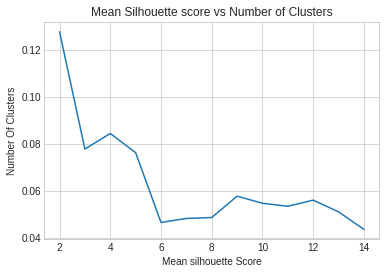

1
red : 64  : 0


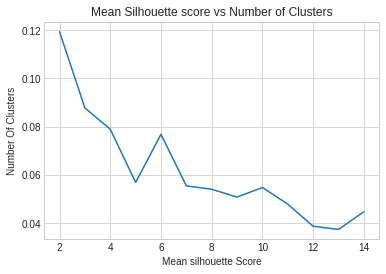

1
dark : 79  : 0


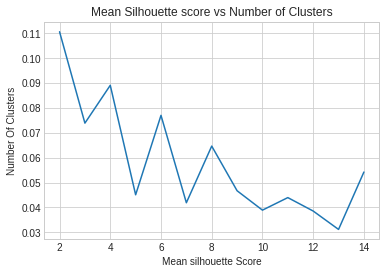

1
dead : 55  : 0


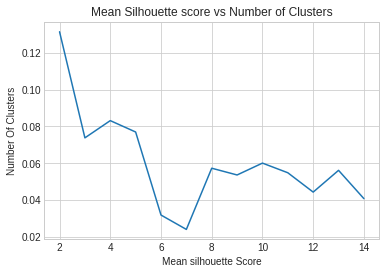

1
military : 61  : 0


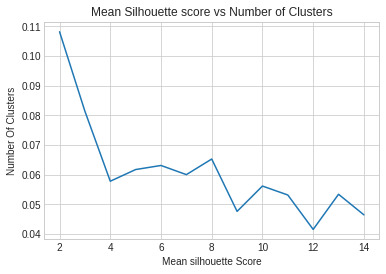

1
white : 69  : 0


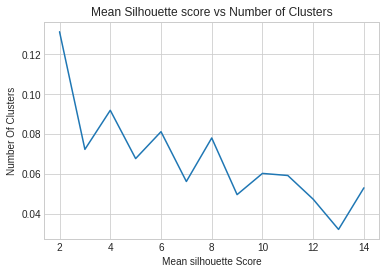

1
cold : 54  : 0


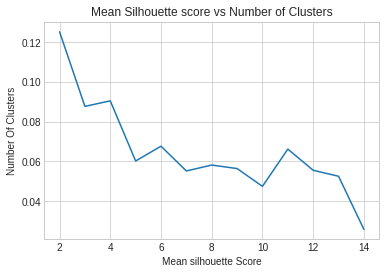

1
black : 81  : 0


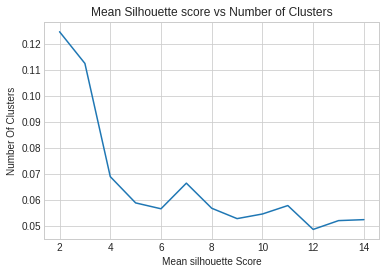

1
hard : 61  : 0


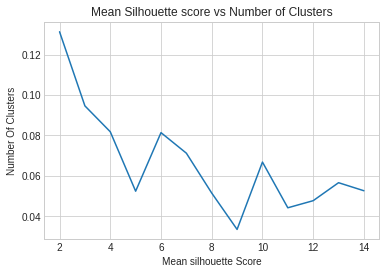

1
little : 272  : 0


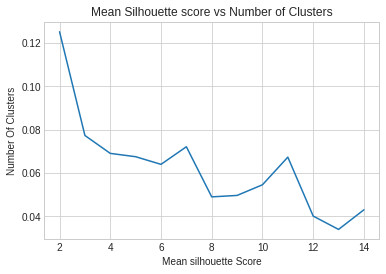

1
short : 78  : 0


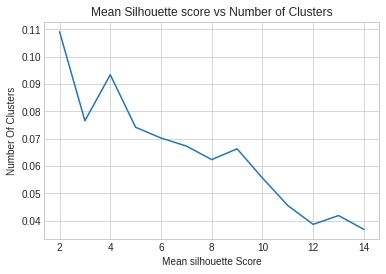

1
big : 115  : 0


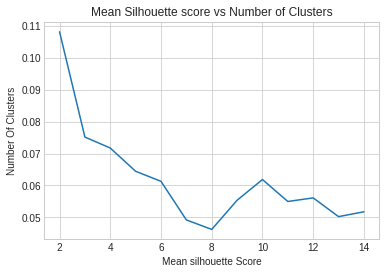

1
full : 88  : 1


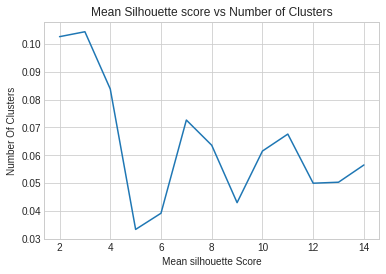

1
clear : 67  : 0


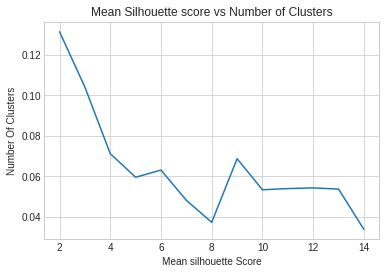

1
high : 203  : 2


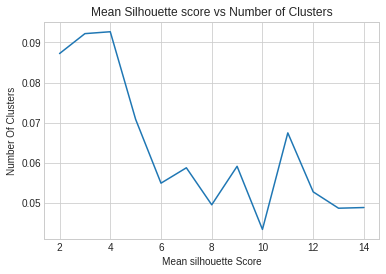

1
mass : 62  : 0


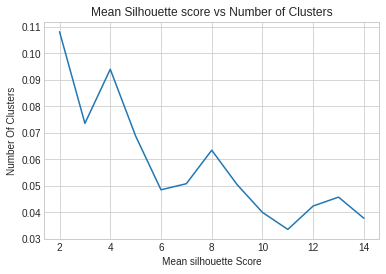

1
low : 78  : 0


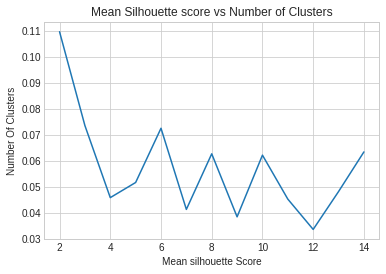

1
large : 130  : 0


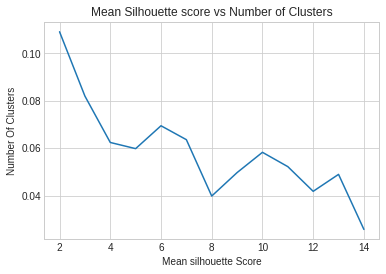

In [ ]:
with open (output_dir+'PCA_Analysis.txt','w')as txtfile:
  for ifile in files:
    index = 0
    words.append(ifile.split('/')[-1].split('.')[0])
    with (open(pklPath+words[-1]+'.pkl', "rb")) as openfile:
        while True:
            try:
              word_vectors = pickle.load(openfile)
            except EOFError:
              break
    k_Components = word_vectors[list(word_vectors.keys())[1]]
    if k_Components>5:
      #print(k_Components)
      #print(arr.shape)
      K = range(1,min(15,k_Components))
      mogs = [GaussianMixture(n_components=k,max_iter=500).fit(arr) for k in K]
      bics = [mog.bic(arr) for mog in mogs]
      aics = [mog.aic(arr) for mog in mogs]
      llks = [mog.score(arr) for mog in mogs]
      ss = []
      for mog in mogs:
        y = mog.predict(arr)
        try:
          ss.append(metrics.silhouette_score(arr,y))
        except:
          print(mog.n_components)
          pass
      file.write(words[-1],",",k_Components," ,",np.argmax(ss)+2,np.max(ss))
      #plt.plot(range(2,15),ss)
      #plt.xlabel('Mean silhouette Score')
      #plt.ylabel('Number Of Clusters')
      #plt.title('Mean Silhouette score vs Number of Clusters')
      #plt.show()

In [ ]:
K = range(1,min(15,k_Components))
mogs = [GaussianMixture(n_components=k,max_iter=500).fit(arr) for k in K]
bics = [mog.bic(arr) for mog in mogs]
aics = [mog.aic(arr) for mog in mogs]
llks = [mog.score(arr) for mog in mogs]

In [ ]:
ss = []
for mog in mogs:
  y = mog.predict(arr)
  try:
    ss.append(metrics.silhouette_score(arr,y))
  except:
    print(mog.n_components)
    pass
  
#print("\n Weights Per Cluster:{}".format(optimal_mog.weights_))
  #print("\n Prediction of Cluster:{}".format(mog.predict(arr)))

1


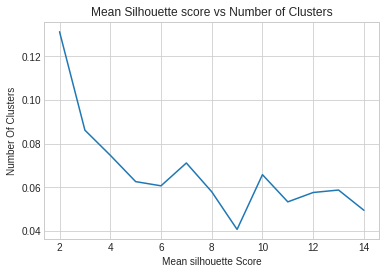

In [ ]:
plt.plot(range(2,15),ss)
plt.xlabel('Mean silhouette Score')
plt.ylabel('Number Of Clusters')
plt.title('Mean Silhouette score vs Number of Clusters')
plt.show()

In [ ]:
np.argmax(ss)

0

In [ ]:
ss

[0.116692916,
 0.08551475,
 0.10679506,
 0.13316464,
 0.11391346,
 0.1084944,
 0.12546799,
 0.09228623,
 0.094440505,
 0.07601053,
 0.088985585,
 0.102473706,
 0.09003658]

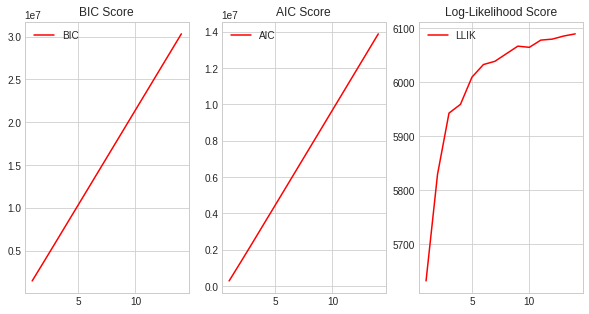

In [ ]:
K = range(1,min(15,k_Components))

fig, axs = plt.subplots(1,3, figsize=(10,5))

axs[0].plot(K, bics,'r' , label = 'BIC')
axs[0].legend()
axs[0].set_title('BIC Score')


axs[1].plot(K, aics,'r' , label = 'AIC' )
axs[1].legend()
axs[1].set_title('AIC Score')

axs[2].plot(K, llks,'r' , label = 'LLIK' )
axs[2].legend()
axs[2].set_title('Log-Likelihood Score')
plt.show()

In [ ]:
#arr1 = np.transpose(arr)
optimal_components = 4
optimal_mog = GaussianMixture(n_components=optimal_components,max_iter=1000)

In [ ]:
y = optimal_mog.fit_predict(arr)

In [ ]:
from sklearn import metrics
metrics.silhouette_score(arr,y)

0.18864106

In [ ]:
print("\n Weights Per Cluster:{}".format(optimal_mog.weights_))
print("\n Prediction of Cluster:{}".format(optimal_mog.predict(arr)))
print("\n Prediction of Prob Cluster:{}".format(optimal_mog.predict_proba(arr)))


 Weights Per Cluster:[0.27027027 0.18918919 0.27927928 0.26126126]

 Prediction of Cluster:[0 3 3 1 2 3 1 1 2 2 2 1 2 2 1 2 3 2 3 0 0 0 0 1 0 1 0 2 2 2 0 3 1 1 3 3 1
 3 3 3 3 0 0 0 3 3 3 2 2 0 1 1 2 2 3 3 3 2 0 0 3 3 3 3 2 1 2 1 2 0 3 3 0 2
 2 3 0 1 0 0 0 2 0 1 2 1 0 1 0 0 0 0 2 0 3 1 3 3 2 2 2 2 0 1 1 2 3 0 0 2 2]

 Prediction of Prob Cluster:[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 

In [ ]:
clusters = optimal_mog.predict(arr)
word_vectors_group = np.zeros((optimal_components,1024))

In [ ]:
for i in range(len(clusters)):
  word_vectors_group[clusters[i],:] =  word_vectors_group[clusters[i],:] + arr[i,]


In [ ]:
print("\n Prediction of Cluster:{}".format(optimal_mog.predict(word_vectors_group)))
#print("\n Prediction of Prob Cluster:{}".format(optimal_mog.predict_proba(word_vectors_group)))
optimal_mog.means_.shape


 Prediction of Cluster:[1 0 0 0]


(4, 1024)

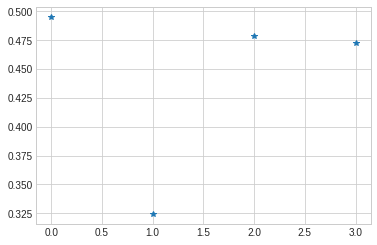

In [ ]:
plt.plot(np.mean(word_vectors_group.T,axis=0),'*')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


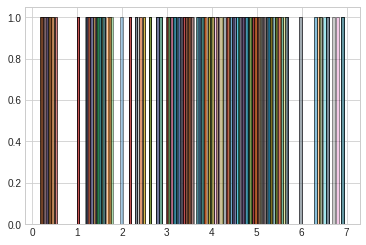

In [ ]:
for mog in mogs:
  for k in range(mog.n_components):
    sns.distplot(mog.means_[k,:], hist=True, kde=False, 
                bins=int(360/5),
                hist_kws={'edgecolor':'black'})
  

In [ ]:
X =arr
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type='full').fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)


In [ ]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
 m1_b = mixture.BayesianGaussianMixture(n_components=4, covariance_type="full").fit(arr)
 y = m1_b.fit_predict(arr)
 metrics.silhouette_score(arr,y)

0.18694615

True

In [ ]:
m1_b.weights_

array([0.21097938, 0.35364739, 0.15990772, 0.2754655 ])

In [ ]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9.0, 5.0)
    plt.ylim(-3.0, 6.0)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(3,svd_solver='full')
principalComponents = pca.fit_transform(arr)
principalComponents

array([[ 2.3451321e+00,  3.0690463e+00,  9.6292031e-01],
       [-9.6426630e-01, -3.9354734e+00,  1.7919912e+00],
       [ 3.7005479e+00,  2.3055880e+00, -5.2797756e+00],
       [-5.4432261e-01,  2.2091289e+00,  6.4790535e-01],
       [-1.8867306e+00, -2.1666052e+00,  9.9671438e-02],
       [ 2.2769408e+00,  1.6569120e+00,  2.6143749e+00],
       [ 2.6222138e+00,  2.4073269e+00,  1.6384573e+00],
       [ 2.9390786e+00,  3.5563941e+00, -3.1290045e+00],
       [ 3.4351552e-01,  2.9915245e+00,  2.4029982e+00],
       [ 3.5365736e+00,  2.2562025e+00,  3.8029816e+00],
       [ 5.8245838e-01, -5.0059897e-01, -1.1763943e+00],
       [ 1.4939742e+00, -2.2696636e+00,  6.3167059e-01],
       [ 6.1494517e-01,  1.6151445e+00, -1.3362951e+00],
       [-4.8942585e+00, -4.1982760e+00, -1.5521421e+00],
       [ 2.2821922e+00, -1.5641559e+00, -3.6201337e-01],
       [ 5.7413034e+00, -1.9690045e+00,  3.7607708e+00],
       [-4.2625914e+00,  3.5833786e+00, -2.9344325e+00],
       [ 1.2817906e+00, -5.3333

In [ ]:
for word in objects:
  n = word['n']
  s = word['S']
  xxt = word['XXT'] 
    
  cov = xxt/(n-1) - s.dot(s.T)/((n-1)**2)
  mu = s/n
  u,s,vh = np.linalg.svd(cov)
  logdet = np.log(s[s>1e-10]).sum()

pca = PCA()
pca.fit(cov)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
K = 2
x = arr.copy()
N = 108
d = 1024
D=1024
max_it = 100
z = np.zeros((N,K))
pi = np.zeros(K,dtype=float)
mu = np.zeros((K,d),dtype=float)
llik=np.zeros(max_it,dtype=float)
Sigma = np.zeros((d,d,K),dtype=float)
pi = np.random.random(K)
pi = pi / np.sum(pi)
for k in range(K):
  mu[k,:] = np.mean(x,axis=0)
  Sigma[:,:,k]=np.cov(x.T)+1

In [ ]:
np.mean(arr,axis=0)

array([-0.42302147, -0.07790128,  0.29171482, ...,  0.28218067,
       -0.19437751, -0.16655532], dtype=float32)

In [ ]:
for it in range(max_it):
  
  llik[it] = 0
  
  # Expectation Step
  
  for n in range(N):
    
    for k in range(K):      
      z[n,k] = pi[k] *  multivariate_normal.pdf(x[n,:], mean=mu[k,:], cov=np.diag(Sigma[:,:,k])) # dmvnorm(x[n,],mu[k,],Sigma[,,k])
       
    llik[it] = llik[it]+np.log(np.sum(z[n,]))    
    z[n,] = z[n,]/sum(z[n,])

  print("iteration: ", it, "log likelihood: ", llik[it], "\n")
  
  # Maximization Step  
  for k in range(K):    
    pi[k] = sum(z[:,k])/N    
    for d in range(D):      
      mu[k,D] = sum(x[:,d] * z[:,k])/sum(z,k)      
        
    for d1 in range(D):      
      for d2 in range(D):        
        Sigma[d1,d2,k] = sum((x[:,d1]-mu[k,d1]) * (x[:,d2]-mu[k,d2]) * z[:,k])/sum(z[:,k])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


iteration:  0 log likelihood:  -inf 



IndexError: ignored

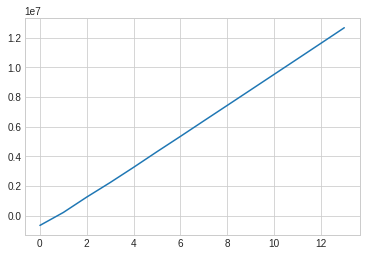

In [ ]:
plt.plot(aics_train)

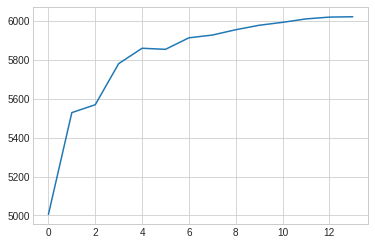

In [ ]:
plt.plot(llks_train)

In [ ]:
sum(x[:,d] * z[:,k])/sum(z,k)

array([nan, nan])

In [ ]:
sum(x[:,d] * z[:,k])/sum(z,k)  

array([nan, nan])

In [ ]:
mu[:,:].shape

(2, 1024)

In [ ]:
mu[k,:]

array([0.09037443, 0.25003503, 0.75802456, ..., 0.7440602 , 0.82384481,
       0.36782845])

In [ ]:
Sigma[:,:,k]

array([[0.11972158, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.53628327, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07577187, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.93897533, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.80642911,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19843202]])

In [ ]:
 multivariate_normal.pdf(x[101,:], mean=mu[k,:], cov=Sigma[:,:,k])

0.0

In [ ]:
K = range(1,min(15,k_Components))
mogs = [GaussianMixture(n_components=k,max_iter=500).fit(arr_train) for k in K]
bics_train = [mog.bic(arr_train) for mog in mogs]
bics_test = [mog.bic(arr_test) for mog in mogs]
aics_train = [mog.aic(arr_train) for mog in mogs]
aics_test = [mog.aic(arr_test) for mog in mogs]
llks_train = [mog.score(arr_train) for mog in mogs]
llks_test = [mog.score(arr_test) for mog in mogs]

fig, axs = plt.subplots(1,3, figsize=(10,5))

axs[0].plot(K, bics_train,'r*' , label = 'BIC')
axs[0].plot(K, bics_test,color='b')
axs[0].legend()
axs[0].set_title('BIC Score')


axs[1].plot(K, aics_train,'r*' , label = 'AIC' )
axs[1].plot(K, aics_test,'b' )
axs[1].legend()
axs[1].set_title('AIC Score')

axs[2].plot(K, llks_train,'r*' , label = 'LLIK' )
axs[2].plot(K, llks_test,'b' )
axs[2].legend()
axs[2].set_title('Log-Likelihood Score')
plt.show()